In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import glob
from pprint import pprint
from scripts.constants import COLUMNS_FOR_DATASET

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
BU_FOLDER2 = os.path.join(os.path.dirname(CURRENT_FOLDER), "cluster_backup", "gradu_cluster_backup_16042023")

In [6]:
ci_coverage_files = glob.glob(os.path.join(BU_FOLDER2, "results", 'ci_coverage_napsu_discretized_*.csv'))

In [7]:
pprint(ci_coverage_files)

['/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_discretized_model_adult_high_discretization_80e_empty.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_discretized_model_adult_low_discretization_30e_empty.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_discretized_model_adult_low_discretization_10e_empty.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_discretized_model_adult_high_discretization_01e_empty.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_discretized_model_adult_low_discretization_80e_empty.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_discretized_model_adult_high_discretization_03e_empty.csv',
 '/home/local/jarlehti/pr

In [9]:
df = pd.read_csv(ci_coverage_files[0])
df

,original_dataset_name,index,n_datasets,conf_int_range,conf_int_start,conf_int_end,conf_int_width,true_parameter_value,contains_true_parameter,discretization,experiment_id,epsilon
0,adult_high_discretization,0,100,0.05,9.131802e-02,9.372076e-02,2.402741e-03,0.130312,False,high,TRA1MZ9H,8.0
1,adult_high_discretization,0,100,0.05,-3.854870e-01,-3.840695e-01,1.417531e-03,-0.472646,False,high,TRA1MZ9H,8.0
2,adult_high_discretization,0,100,0.05,5.637330e-02,5.676334e-02,3.900390e-04,0.047235,False,high,TRA1MZ9H,8.0
3,adult_high_discretization,0,100,0.05,-9.337843e-01,-9.312320e-01,2.552290e-03,-0.934658,False,high,TRA1MZ9H,8.0
4,adult_high_discretization,0,100,0.05,3.011809e-01,3.034698e-01,2.288946e-03,0.524744,False,high,TRA1MZ9H,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7595,adult_high_discretization,49,100,0.95,-9.693559e-01,-8.932618e-01,7.609412e-02,-0.934658,True,high,TRA1MZ9H,8.0
7596,adult_high_discretization,49,100,0.95,2.501094e-01,3.622001e-01,1.120907e-01,0.524744,False,high,TRA1MZ9H,8.0
7597,adult_high_discretization,49,100,0.95,-1.744592e+18,1.744592e+18,3.489185e+18,0.599168,True,high,TRA1MZ9H,8.0
7598,adult_high_discretization,49,100,0.95,1.557487e+00,1.776880e+00,2.193932e-01,1.720929,True,high,TRA1MZ9H,8.0


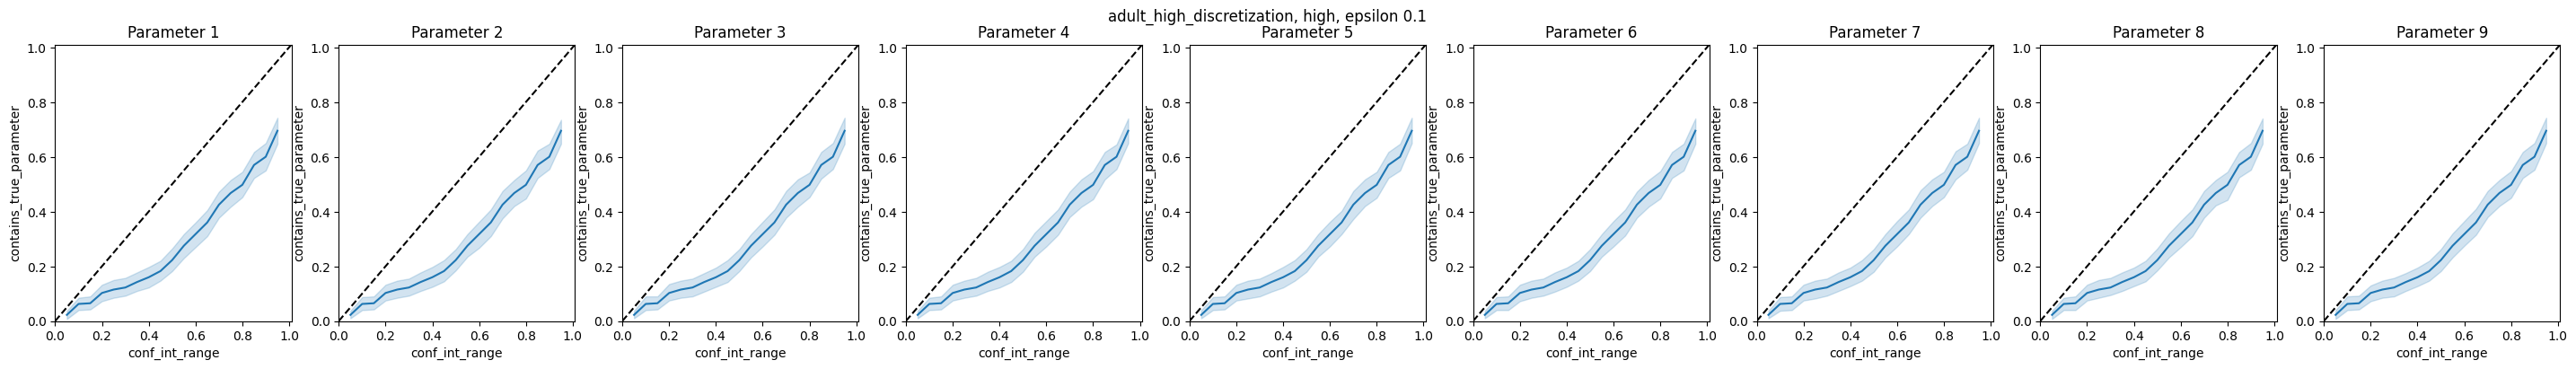

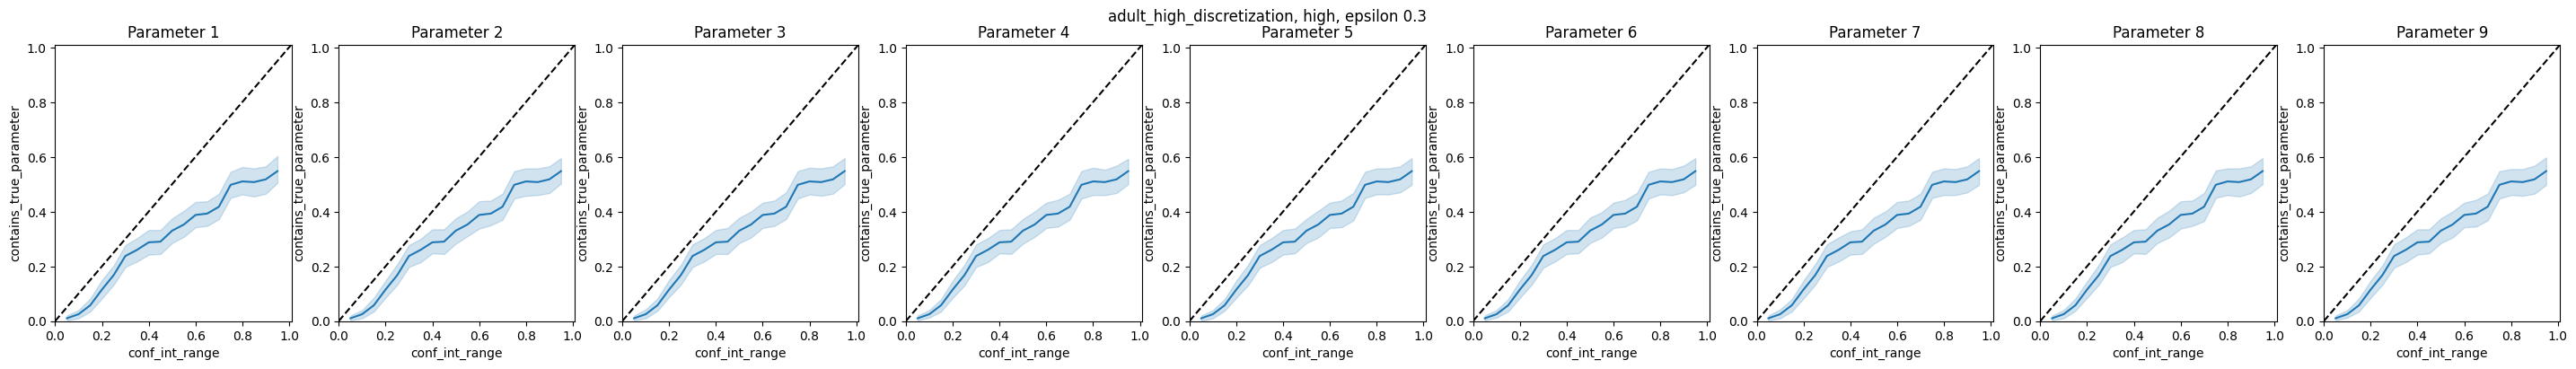

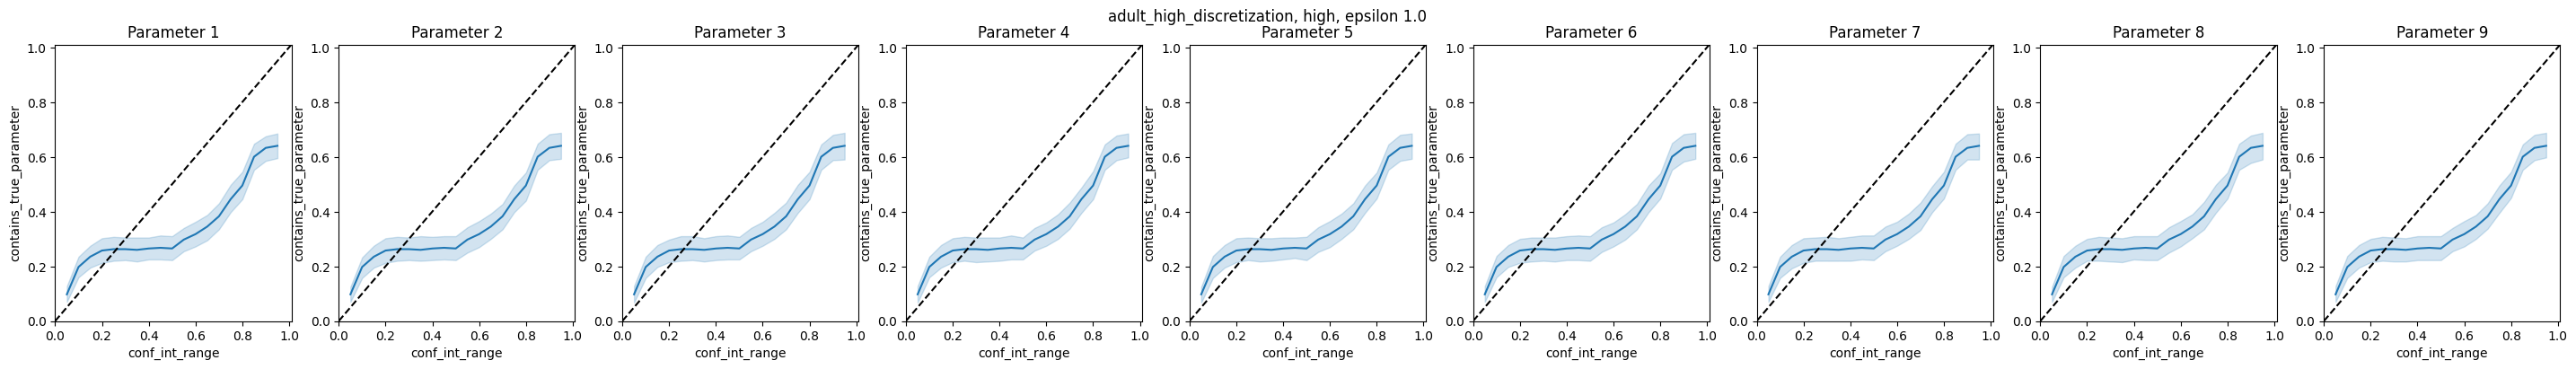

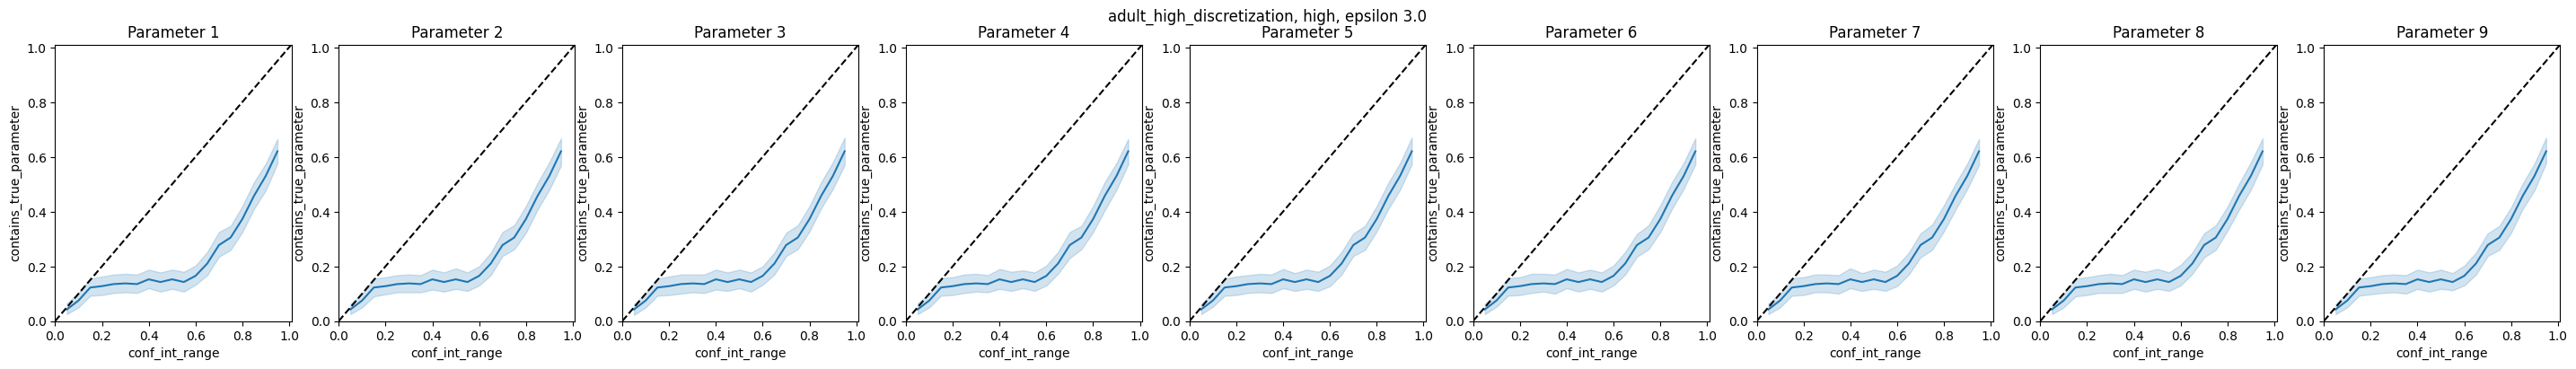

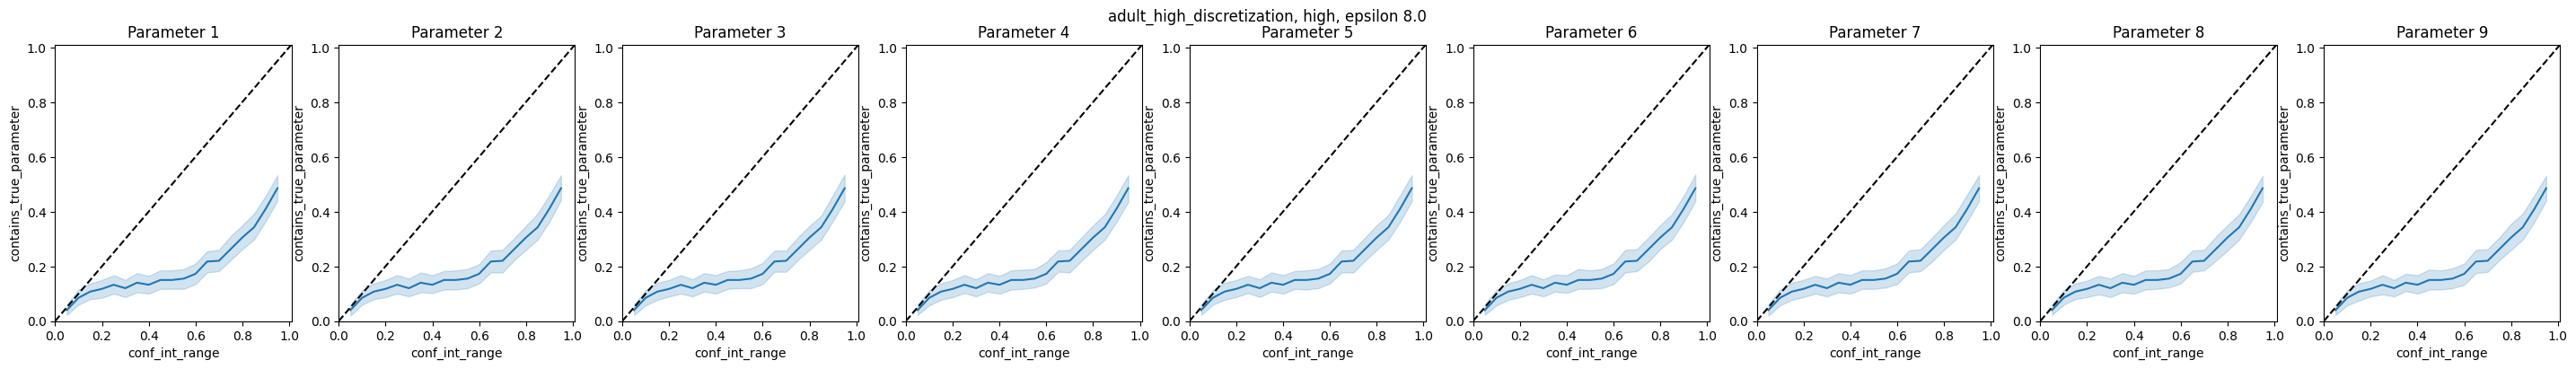

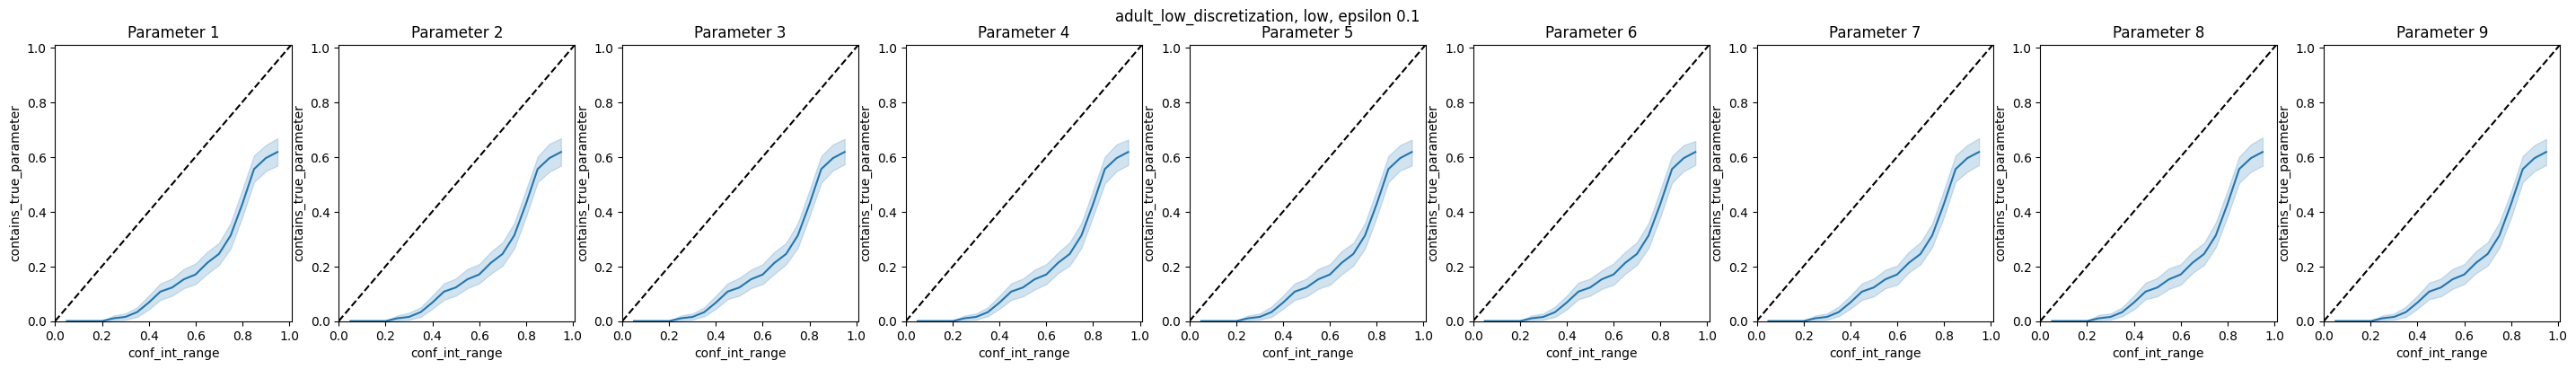

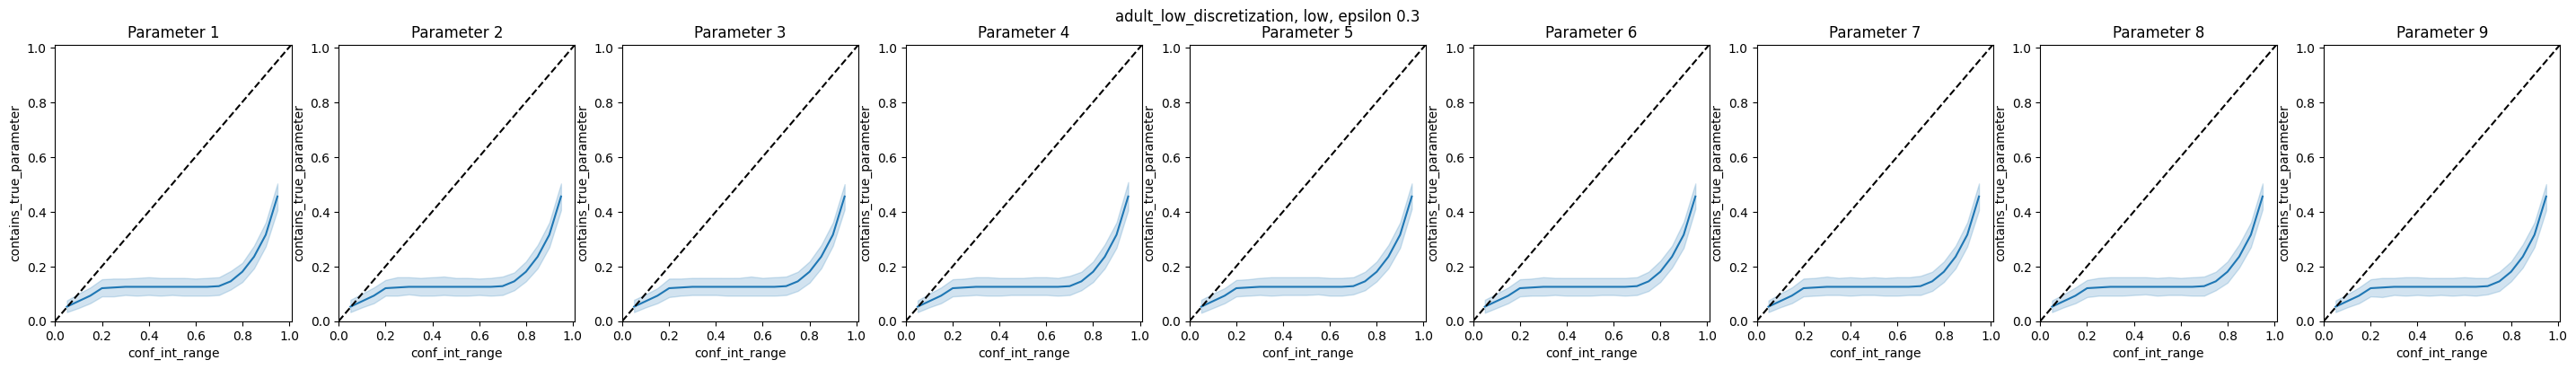

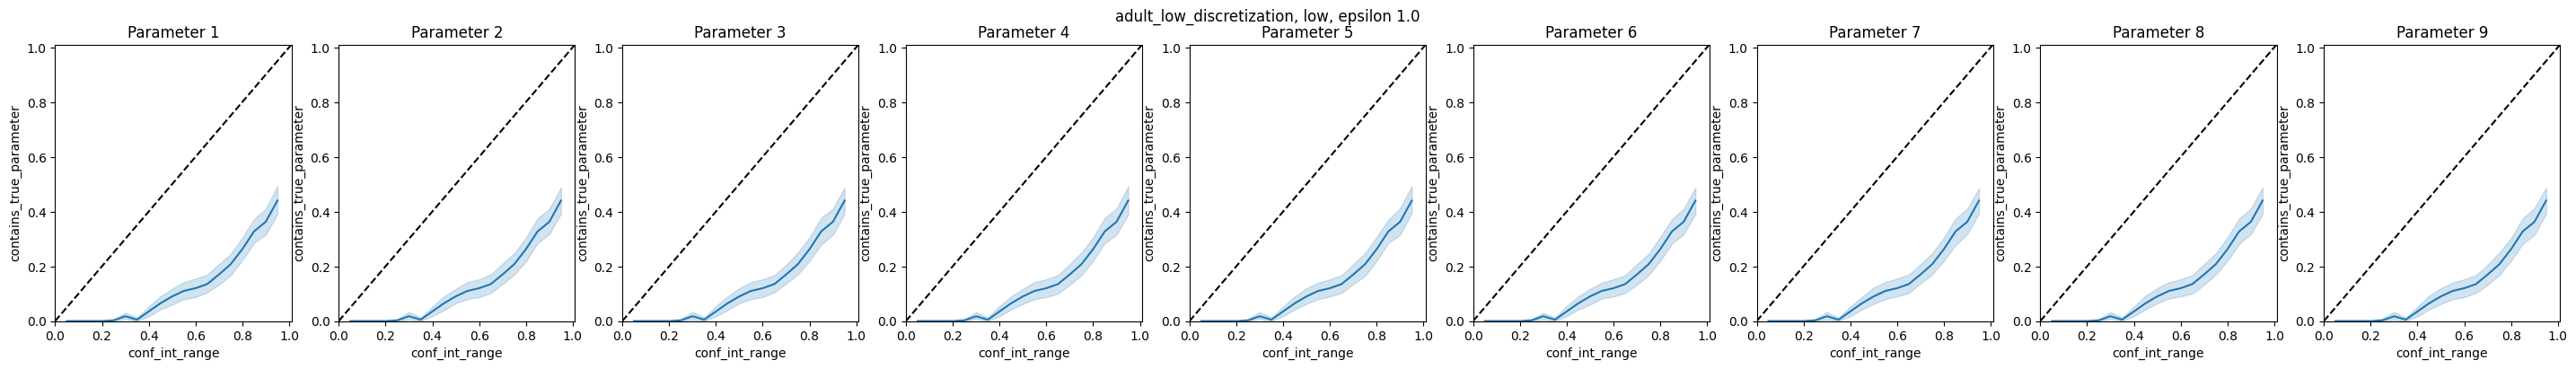

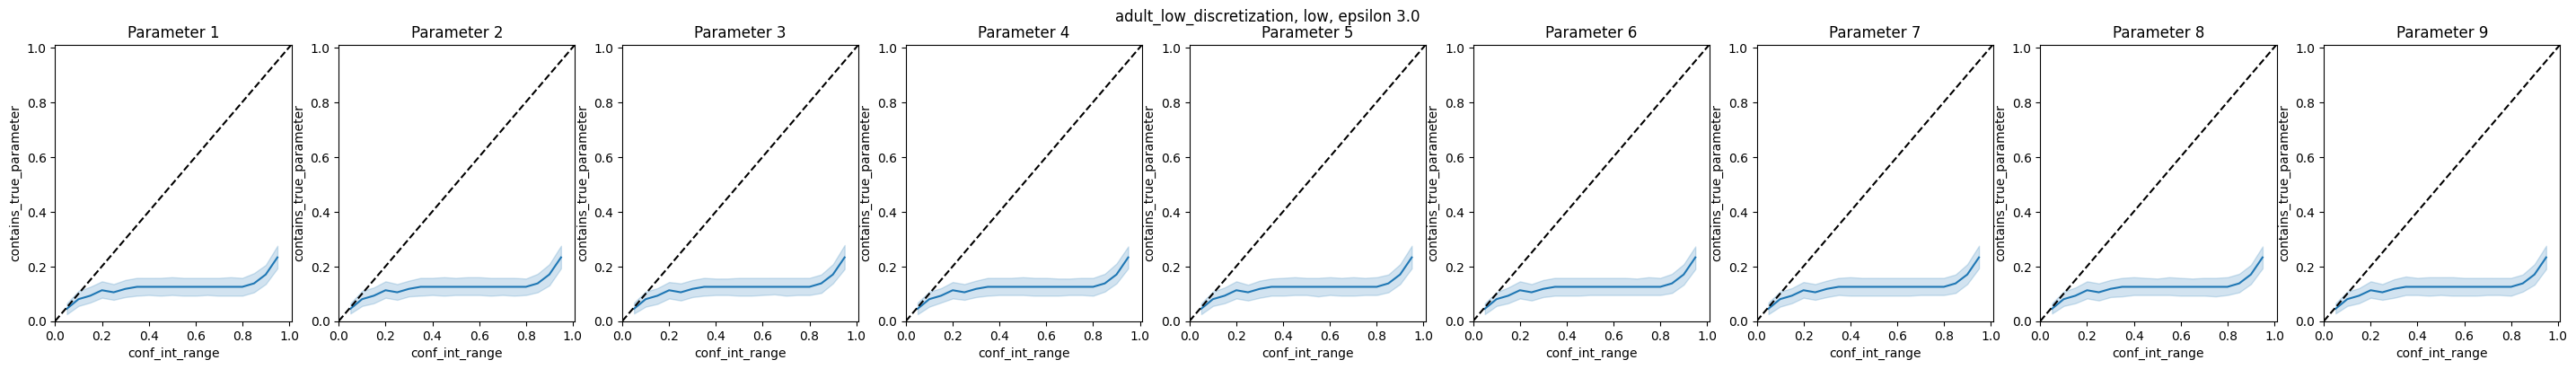

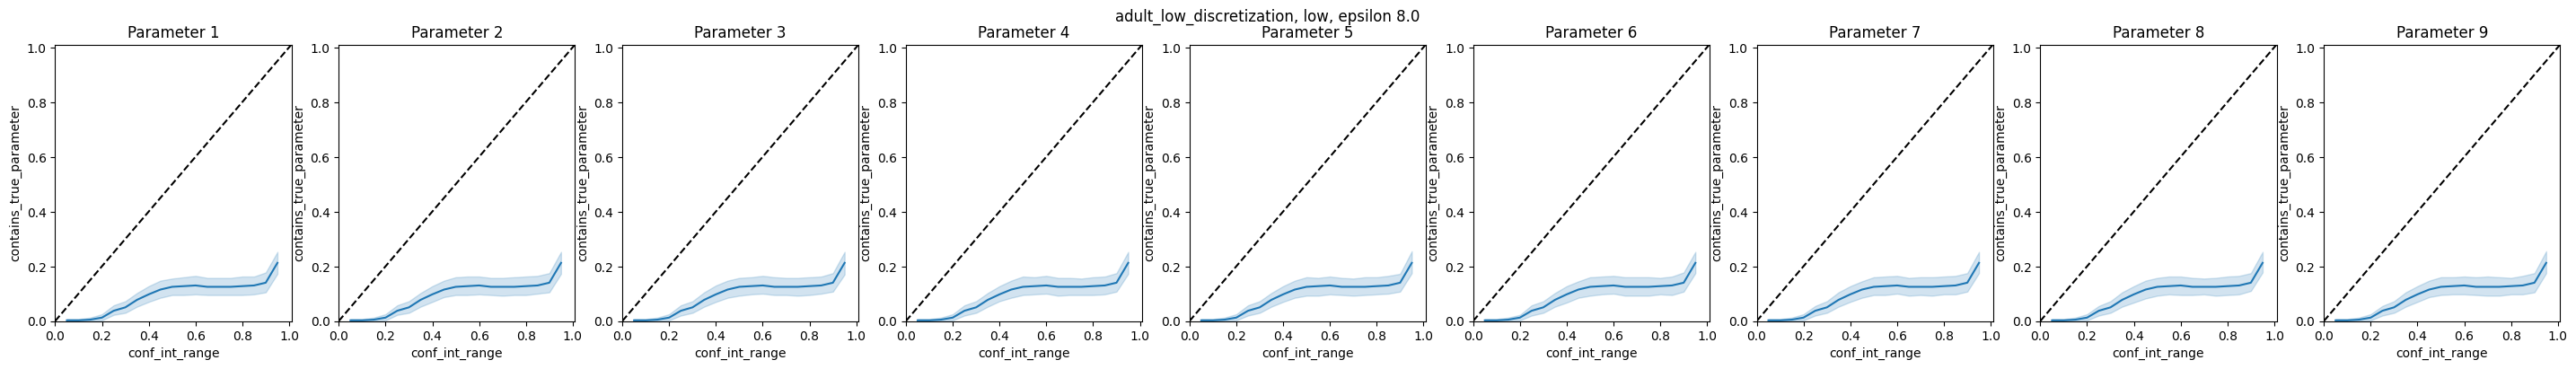

In [12]:
for file in sorted(ci_coverage_files):
    df = pd.read_csv(file)
    original_datset_name = df['original_dataset_name'][0] 
    discretization = df['discretization'][0]
    epsilon = df['epsilon'][0]
    
    dims = len(COLUMNS_FOR_DATASET[original_datset_name])
    
    fig, axes = plt.subplots(1, dims, figsize=(dims*4, 4))

    for i in range(dims):
        ax = axes[i]
        g = sns.lineplot(x="conf_int_range", y="contains_true_parameter", markers=True, err_style="band", data=df, ax=ax)
        diag = (0.0, 1.01)
        ax.plot(diag, diag, linestyle="dashed", color="black")
        ax.set_xlim(diag)
        ax.set_ylim(diag)
        ax.set_title(f"Parameter {i+1}")
    
    fig.suptitle(f"{original_datset_name}, {discretization}, epsilon {epsilon}")
    plt.show()